In [1]:
import matplotlib.pyplot as plt

def implot(data, w):
    fig = plt.figure()
    fig.add_subplot(111, projection=w)
    plt.imshow(data, origin='lower', cmap=plt.cm.viridis, vmin =0, vmax=1)
    plt.xlabel('RA')
    plt.ylabel('Dec')


In [2]:
from astropy.nddata import Cutout2D
from astropy import coordinates
from astropy import units as u

def imcrop(mylon, mylat, xsize, ysize, im, w):
    # example coordinate - you'll have to figure one out that's in your map
    center = coordinates.SkyCoord(mylon*u.deg, mylat*u.deg, frame='fk5')

    # then make an array cutout
    co = nddata.Cutout2D(im, center, size=[ysize, xsize]*u.deg, wcs=w)

    return co.data, co.wcs#making cutout of image...based on https://stackoverflow.com/questions/33512681/splicing-image-array-fits-file-using-coordinates-from-header


['regrid_hub_longexp_leakage126_eps_0.001_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.01_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.05_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.1_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.5_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.7_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.8_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.9_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_9.9_ston_0.8.fits']


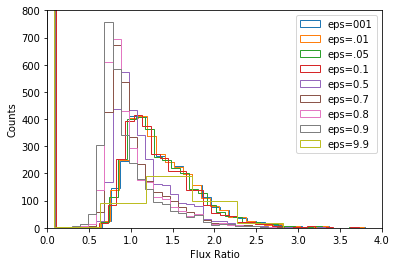

In [10]:
import glob
filenames = glob.glob('*.fits')
print(filenames)

#handling image ^@^@^@^@data
import sys

from astropy.io import fits
from astropy import wcs


#HH7 region...mylat and mylon are center coords of a rectangular region, xsize and ysize are the width and length
# mylat = '3h29m08.423s'
# mylon = '+31d15m28.34s'
# xsize  = 95.9
# ysize = 44.753333


for file in filenames:
    hdu1 = fits.open(file)  #import image
    w = wcs.WCS(hdu1[0].header)   #get wcs coords
    data = hdu1[0].data    #grab data
    hdu1.close()
    
#     implot(data, w)     #plot

#     datacut, wcut  = imcrop(mylon, mylat, xsize, ysize, data, w)
#     implot(data[120:170, 500:610], w)  #plotting to confirm
    datacut = data[120:170, 500:610].flatten()  #couldn't get cutout2d working...narrowed in on pixels by hand...should be the same regardless, though

    plt.hist(datacut, bins=40, histtype='step', label='eps='+file[-17:-14])
    plt.legend()
    plt.xlim(0, 4)
    plt.ylim(0, 800)
    plt.xlabel('Flux Ratio')
    plt.ylabel('Counts')




#     plt.savefig('datacut.png')
#     sys.exit()


['regrid_hub_longexp_leakage126_eps_0.001_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.01_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.05_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.1_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.5_ston_0.8.fits']


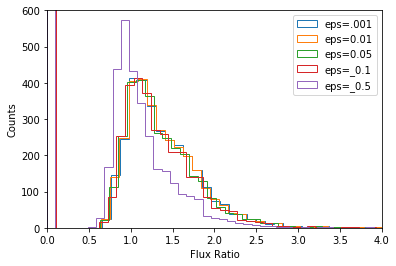

In [6]:
filenames = glob.glob('*.fits')[0:-4]
print(filenames)

#handling image data
import sys

from astropy.io import fits
from astropy import wcs


for file in filenames:
    hdu1 = fits.open(file)  #import image
    w = wcs.WCS(hdu1[0].header)   #get wcs coords
    data = hdu1[0].data    #grab data

    datacut = data[120:170, 500:610].flatten()  #couldn't get cutout2d working...narrowed in on pixels by hand...should be the same regardless, though
    plt.hist(datacut, bins=40, histtype='step', label='eps='+file[-18:-14])
    plt.legend()


    plt.xlim(0, 4)
    plt.ylim(0, 600)
    plt.xlabel('Flux Ratio')
    plt.ylabel('Counts')

    hdu1.close()

plt.savefig('loweps.png')  #import image


['regrid_hub_longexp_leakage126_eps_0.5_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.7_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.8_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.9_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_9.9_ston_0.8.fits']


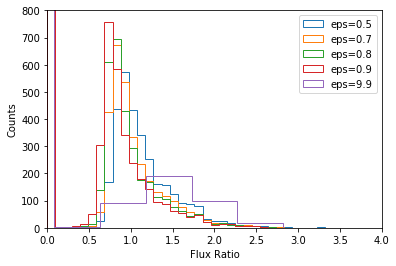

In [8]:
#grabbing filenames,   images to be cut from and histogrammed
filenames = glob.glob('*.fits')[4:]
print(filenames)

#handling image data
import sys

from astropy.io import fits
from astropy import wcs


for file in filenames:
    hdu1 = fits.open(file)  #import image
    w = wcs.WCS(hdu1[0].header)   #get wcs coords
    data = hdu1[0].data    #grab data

    datacut = data[120:170, 500:610].flatten()  #couldn't get cutout2d working...narrowed in on pixels by hand..^@^@_Ð^@^@^@^@uld be the same regardless, though
    plt.hist(datacut, bins=40, histtype='step', label='eps='+file[-17:-14])
    plt.legend()

    plt.xlim(0, 4)
    plt.ylim(0, 800)
    plt.xlabel('Flux Ratio')
    plt.ylabel('Counts')
    hdu1.close()

plt.savefig('higheps.png')#grabbing filenames, images to be cut from and histogrammed
